In [2]:
using Pkg; Pkg.activate(".");
Pkg.precompile()
using Plots; plotlyjs();
using FourierAnalysis, FFTW, DSP, CSV, Tables;

 Activating environment at `~/Documents/thesis.git/coding/01_exploration/Project.toml`
Precompiling project...


In [29]:
ecg_matrix = CSV.File("../mitbih/100.csv.mitbih") |> Tables.matrix;

fs = 360     # 360 samples per second
N  = 2 * fs  # equivalent to 2 seconds

ecg = ecg_matrix[1:N, 1:2];

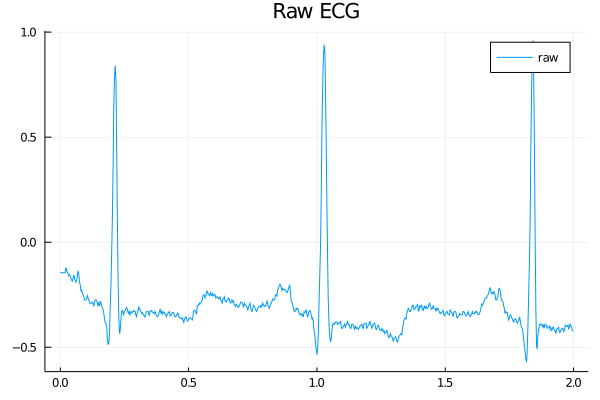

In [44]:
plot(ecg[:,1], ecg[:,2], title="Raw ECG", label="raw")

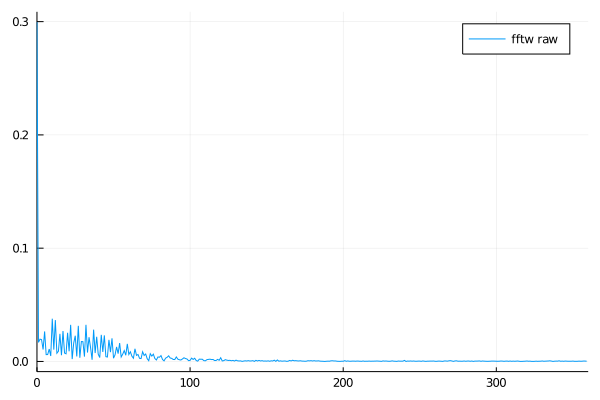

In [45]:
# using FFTW.jl only
frequencies = ((-N/2):(N/2-1))
F  = 1/N * fftshift(fft(ecg[:, 2]))
#F[361] = 0

plot(frequencies, abs.(F), labels="fftw raw", xlim=(0, N÷2))

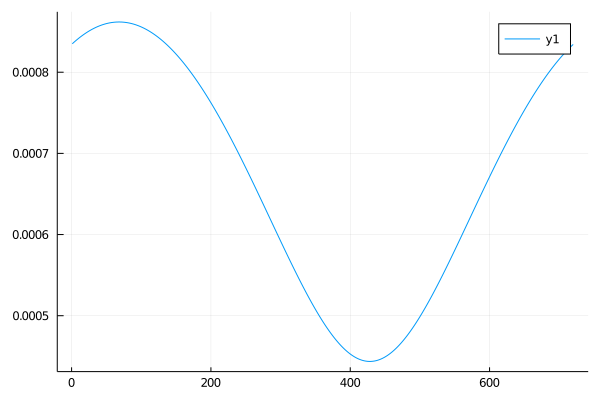

In [64]:
F1 = zeros(ComplexF64, length(F))

for i in 1:2
    F1[i] = F[i]
end
    
ecg_rec = ifft(ifftshift(N * F1))
plot(abs.(ecg_rec))

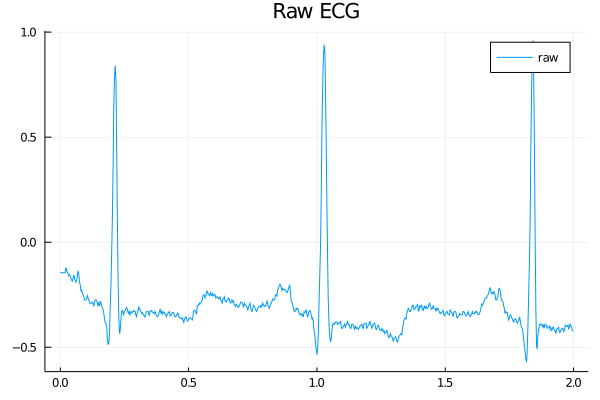

In [65]:
plot(ecg[:,1], ecg[:,2], title="Raw ECG", label="raw")